<a href="https://colab.research.google.com/github/Crystalilesta/Tugas-Python-Mg-11/blob/main/Tugas11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
ls

'Dataset Daun'/          Untitled          Untitled1.ipynb
'insyaallah fix.ipynb'   Untitled0.ipynb   Untitled2.ipynb
 nnmodel_daun/          'Untitled (1)'     Untitled3.ipynb


In [3]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [17]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Dataset Daun")
data = []
labels = []

[INFO] loading images...


In [18]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 128x128 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [19]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [20]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [21]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [22]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(447, 240, 240, 3)
(150, 240, 240, 3)


In [23]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(240,240,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 238, 238, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 119, 119, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 117, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 107648)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10764900  
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [24]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [25]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 17s 1s/step - loss: 3.6746 - accuracy: 0.1969 - val_loss: 1.6339 - val_accuracy: 0.2667
Epoch 2/25
14/14 [==============================] - 17s 1s/step - loss: 1.5339 - accuracy: 0.3468 - val_loss: 1.4986 - val_accuracy: 0.3933
Epoch 3/25
14/14 [==============================] - 17s 1s/step - loss: 1.3460 - accuracy: 0.4989 - val_loss: 1.3730 - val_accuracy: 0.4667
Epoch 4/25
14/14 [==============================] - 17s 1s/step - loss: 1.0419 - accuracy: 0.6353 - val_loss: 1.1733 - val_accuracy: 0.5467
Epoch 5/25
14/14 [==============================] - 17s 1s/step - loss: 0.7070 - accuracy: 0.7517 - val_loss: 1.0021 - val_accuracy: 0.6467
Epoch 6/25
14/14 [==============================] - 17s 1s/step - loss: 0.4679 - accuracy: 0.8501 - val_loss: 0.9230 - val_accuracy: 0.6667
Epoch 7/25
14/14 [==============================] - 17s 1s/step - loss: 0.2923 - accuracy: 0.9016 - val_loss: 0.8639 - val_accuracy: 0.6600
Epoch 8/25
14/14 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


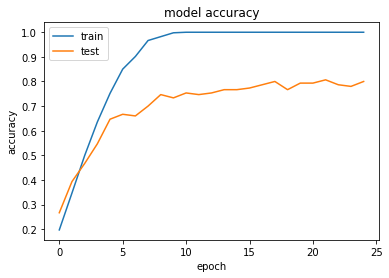

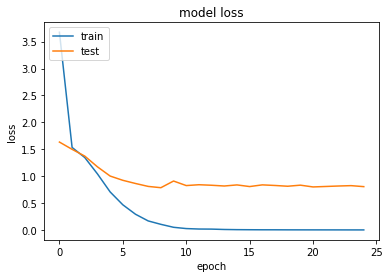

In [26]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_03       0.88      0.88      0.88        26
      GMB_04       0.76      0.76      0.76        29
      GMB_05       0.83      0.77      0.80        31
      GMB_06       0.82      0.80      0.81        35
      GMB_07       0.72      0.79      0.75        29

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150



In [28]:
model.save('nnmodel_daun')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun/assets
